In [1]:
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [112]:
datapath = '/home/rory/1101.csv'
data = pd.read_csv(datapath)

In [113]:
#A(data,2)
data.head()

,Date,Open,High,Low,Close,Volume_n,Volume_m,return,PE
0,1998/1/3,12.84,12.84,12.60,12.60,1624.0,62200.0,-1.81,26.76
1,1998/1/5,12.60,12.70,12.44,12.44,4952.0,187464.0,-1.32,26.41
2,1998/1/6,12.44,12.44,12.21,12.24,3408.0,126192.0,-1.60,25.99
3,1998/1/7,12.27,12.40,12.01,12.01,3207.0,117772.0,-1.90,25.49
4,1998/1/8,11.97,12.11,11.87,11.87,3072.0,110927.0,-1.11,25.21


http://hymar.myweb.hinet.net/study/stock/theory/s118.htm

In [114]:
# 威廉指標(WMS%R或%R)
#應用法則：
#WMS％R低於20表示行情處於強勢階段為超買區，大盤離頂部不遠，應逢高出脫。
#WMS％R高於80表行情處於弱勢階段為超賣區，大盤隨即見底，應逢低買進。
#特色：
#威廉指標常達到0或100上下限值的極端點，致波動過於激烈，所產生騙線的機會亦較多些。
#當行情無法再創新高點或創新低點時，威廉指標會領先出現反轉波動。因此威廉指標具有領先指標的功能。
def WMS(data,day):
    dataList = range(data['Date'].size)
    tmpList = []
    #H = []
    #L = []
    #H_C = []
    #H_L = []
    for item in dataList:
        if item - day + 1 >= 0:
            # 9日WMS%R =(9日內最高價-第9日收盤價) / (9日內最高價-9日內最低價)*100
            #print(data['High'][item-day+1:item+1].max())
            #print(data['Close'][item])
            #print(data['High'][item-day+1:item+1].max() - data['Close'][item])
            #print(data['High'][item-day+1:item+1].max())
            #print(data['Low'][item-day+1:item+1].min())
            #print(data['High'][item-day+1:item+1].max() - data['Low'][item-day+1:item+1].min())
            #H.append(data['High'][item-day+1:item+1].max())
            #L.append(data['Low'][item-day+1:item+1].min())
            #H_C.append(data['High'][item-day+1:item+1].max() - data['Close'][item])
            #H_L.append(data['High'][item-day+1:item+1].max() - data['Low'][item-day+1:item+1].min())
            tmp = 100*(data['High'][item-day+1:item+1].max() - data['Close'][item])/(data['High'][item-day+1:item+1].max() - data['Low'][item-day+1:item+1].min())
            tmpList.append(tmp)
        elif item - day + 1 < 0:
            tmp = 0
            #H_L.append(tmp)
            #H_C.append(tmp)
            #H.append(tmp)
            #L.append(tmp)
            tmpList.append(tmp)
    tmpSeries = pd.Series(tmpList)
    #data['High - Low' + str(day)] = H_L
    #data['High - Close' + str(day)] = H_C  
    #data['High' + str(day)] = H 
    #data['Low' + str(day)] = L
    data['WMS' + str(day)] = tmpSeries

In [115]:
(12.84 - 12.44)/(12.84 - 12.21)

0.6349206349206364

In [116]:
WMS(data,9)
data.head(10)

,Date,Open,High,Low,Close,Volume_n,Volume_m,return,PE,WMS9
0,1998/1/3,12.84,12.84,12.60,12.60,1624.0,62200.0,-1.81,26.76,0.000000
1,1998/1/5,12.60,12.70,12.44,12.44,4952.0,187464.0,-1.32,26.41,0.000000
2,1998/1/6,12.44,12.44,12.21,12.24,3408.0,126192.0,-1.60,25.99,0.000000
3,1998/1/7,12.27,12.40,12.01,12.01,3207.0,117772.0,-1.90,25.49,0.000000
4,1998/1/8,11.97,12.11,11.87,11.87,3072.0,110927.0,-1.11,25.21,0.000000
5,1998/1/9,11.87,11.91,11.61,11.77,3892.0,137463.0,-0.84,25.00,0.000000
6,1998/1/12,11.61,11.67,11.11,11.11,2892.0,99120.0,-5.63,23.59,0.000000
7,1998/1/13,11.28,11.38,11.11,11.34,3604.0,121966.0,2.09,24.08,0.000000
8,1998/1/14,11.51,11.64,11.38,11.58,2606.0,90755.0,2.05,24.58,72.832370
9,1998/1/15,11.64,11.64,11.28,11.28,2899.0,100153.0,-2.58,23.94,89.308176


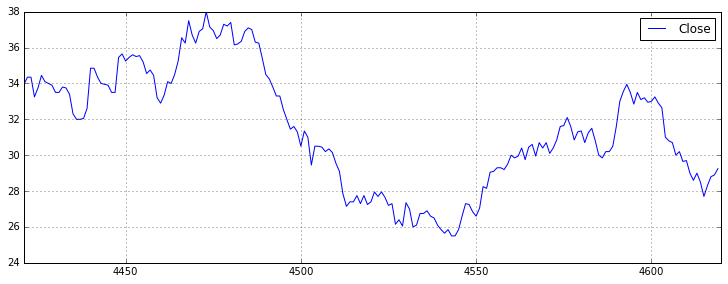

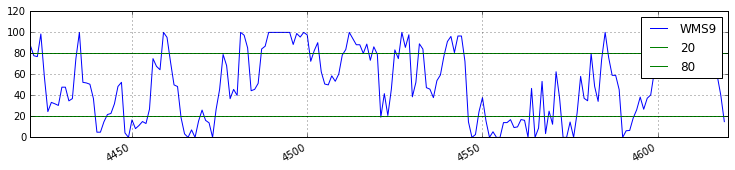

In [117]:
#figsize(12.5, 12.5)
#data[['Close','WMS9']][4321:4621].plot(subplots=True)
from IPython.core.pylabtools import figsize
figsize(12.5, 4.5)
data[["Close"]][4421:4621].plot()
plt.grid()
figsize(12.5, 2.5)
data[["WMS9"]][4421:4621].plot(subplots = True)
plt.axhline(20,color = 'g',linestyle = '-',label = '20')
plt.axhline(80,color = 'g',linestyle = '-',label = '80')
plt.grid()
plt.legend();

In [118]:
def WMS_lag(data,day):
    dataList = range(data['Date'].size)
    tmpList = []
    tmpList.append(0)
    for item in dataList:
        if item - day + 1 >= 0:
            tmp = 100*(data['High'][item-day+1:item+1].max() - data['Close'][item])/(data['High'][item-day+1:item+1].max() - data['Low'][item-day+1:item+1].min())
            tmpList.append(tmp)
        elif item - day + 1 < 0:
            tmp = 0
            tmpList.append(tmp)
    tmpSeries = pd.Series(tmpList)
    data['WMS' + str(day) +'_lag'] = tmpSeries

In [119]:
WMS_lag(data,2)
data.head()

,Date,Open,High,Low,Close,Volume_n,Volume_m,return,PE,WMS9,WMS2_lag
0,1998/1/3,12.84,12.84,12.60,12.60,1624.0,62200.0,-1.81,26.76,0.0,0.000000
1,1998/1/5,12.60,12.70,12.44,12.44,4952.0,187464.0,-1.32,26.41,0.0,0.000000
2,1998/1/6,12.44,12.44,12.21,12.24,3408.0,126192.0,-1.60,25.99,0.0,100.000000
3,1998/1/7,12.27,12.40,12.01,12.01,3207.0,117772.0,-1.90,25.49,0.0,93.877551
4,1998/1/8,11.97,12.11,11.87,11.87,3072.0,110927.0,-1.11,25.21,0.0,100.000000


In [102]:
WMS_lag(data,2)
WMS_lag(data,3)
WMS_lag(data,4)
WMS_lag(data,5)
WMS_lag(data,6)
WMS_lag(data,7)
WMS_lag(data,8)
WMS_lag(data,9)
WMS_lag(data,10)
WMS_lag(data,11)
WMS_lag(data,12)
WMS_lag(data,13)
WMS_lag(data,14)
WMS_lag(data,15)
WMS_lag(data,16)
WMS_lag(data,17)
WMS_lag(data,18)
WMS_lag(data,19)
WMS_lag(data,20)

In [120]:
for i in range(18):
    WMS_lag(data,i+2)

In [126]:
data.head(20)#[4618:4621]

,Date,Open,High,Low,Close,Volume_n,Volume_m,return,PE,WMS9,...,WMS10_lag,WMS11_lag,WMS12_lag,WMS13_lag,WMS14_lag,WMS15_lag,WMS16_lag,WMS17_lag,WMS18_lag,WMS19_lag
0,1998/1/3,12.84,12.84,12.60,12.60,1624.0,62200.0,-1.81,26.76,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1998/1/5,12.60,12.70,12.44,12.44,4952.0,187464.0,-1.32,26.41,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,1998/1/6,12.44,12.44,12.21,12.24,3408.0,126192.0,-1.60,25.99,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,1998/1/7,12.27,12.40,12.01,12.01,3207.0,117772.0,-1.90,25.49,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,1998/1/8,11.97,12.11,11.87,11.87,3072.0,110927.0,-1.11,25.21,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,1998/1/9,11.87,11.91,11.61,11.77,3892.0,137463.0,-0.84,25.00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,1998/1/12,11.61,11.67,11.11,11.11,2892.0,99120.0,-5.63,23.59,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,1998/1/13,11.28,11.38,11.11,11.34,3604.0,121966.0,2.09,24.08,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,1998/1/14,11.51,11.64,11.38,11.58,2606.0,90755.0,2.05,24.58,72.832370,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,1998/1/15,11.64,11.64,11.28,11.28,2899.0,100153.0,-2.58,23.94,89.308176,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [122]:
data[4618:4621]

,Date,Open,High,Low,Close,Volume_n,Volume_m,return,PE,WMS9,...,WMS10_lag,WMS11_lag,WMS12_lag,WMS13_lag,WMS14_lag,WMS15_lag,WMS16_lag,WMS17_lag,WMS18_lag,WMS19_lag
4618,2016/5/24,29.0,29.15,28.8,28.90,4966.0,143707.0,0.35,20.50,40.0,...,58.333333,60.317460,63.768116,64.788732,73.958333,77.064220,77.477477,79.338843,79.338843,79.338843
4619,2016/5/25,29.5,29.50,28.9,29.25,5094.0,148848.0,1.21,20.74,15.0,...,55.000000,55.000000,57.142857,60.869565,61.971831,71.875000,75.229358,75.675676,77.685950,77.685950
4620,2016/5/26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24.444444,43.333333,43.333333,46.031746,50.724638,52.112676,64.583333,68.807339,69.369369,71.900826


In [123]:
data = data.drop(data.index[4620])

In [124]:
data[4618:4621]

,Date,Open,High,Low,Close,Volume_n,Volume_m,return,PE,WMS9,...,WMS10_lag,WMS11_lag,WMS12_lag,WMS13_lag,WMS14_lag,WMS15_lag,WMS16_lag,WMS17_lag,WMS18_lag,WMS19_lag
4618,2016/5/24,29.0,29.15,28.8,28.90,4966.0,143707.0,0.35,20.50,40.0,...,58.333333,60.31746,63.768116,64.788732,73.958333,77.06422,77.477477,79.338843,79.338843,79.338843
4619,2016/5/25,29.5,29.50,28.9,29.25,5094.0,148848.0,1.21,20.74,15.0,...,55.000000,55.00000,57.142857,60.869565,61.971831,71.87500,75.229358,75.675676,77.685950,77.685950


In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4620 entries, 0 to 4619
Data columns (total 28 columns):
Date         4620 non-null object
Open         4620 non-null float64
High         4620 non-null float64
Low          4620 non-null float64
Close        4620 non-null float64
Volume_n     4620 non-null float64
Volume_m     4620 non-null float64
return       4620 non-null float64
PE           4620 non-null float64
WMS9         4620 non-null float64
WMS2_lag     4620 non-null float64
WMS3_lag     4620 non-null float64
WMS4_lag     4620 non-null float64
WMS5_lag     4620 non-null float64
WMS6_lag     4620 non-null float64
WMS7_lag     4620 non-null float64
WMS8_lag     4620 non-null float64
WMS9_lag     4620 non-null float64
WMS10_lag    4620 non-null float64
WMS11_lag    4620 non-null float64
WMS12_lag    4620 non-null float64
WMS13_lag    4620 non-null float64
WMS14_lag    4620 non-null float64
WMS15_lag    4620 non-null float64
WMS16_lag    4620 non-null float64
WMS17_lag    4620 n

In [128]:
data.head()

,Date,Open,High,Low,Close,Volume_n,Volume_m,return,PE,WMS9,...,WMS10_lag,WMS11_lag,WMS12_lag,WMS13_lag,WMS14_lag,WMS15_lag,WMS16_lag,WMS17_lag,WMS18_lag,WMS19_lag
0,1998/1/3,12.84,12.84,12.60,12.60,1624.0,62200.0,-1.81,26.76,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1998/1/5,12.60,12.70,12.44,12.44,4952.0,187464.0,-1.32,26.41,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1998/1/6,12.44,12.44,12.21,12.24,3408.0,126192.0,-1.60,25.99,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1998/1/7,12.27,12.40,12.01,12.01,3207.0,117772.0,-1.90,25.49,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1998/1/8,11.97,12.11,11.87,11.87,3072.0,110927.0,-1.11,25.21,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [131]:
def UP_DOWN(data):
    data_day_number = range(data['Date'].size)
    tmpList = []
    
    for item in data_day_number:
        spread = data['Close'][item] - data['Open'][item]
        if spread > 0 :
            tmp = 1
        elif spread <= 0:
            tmp = 0
 
        tmpList.append(tmp)
    
    tmpSeries = pd.Series(tmpList)
    data['UP_DOWN']=tmpSeries

In [132]:
UP_DOWN(data)

In [133]:
data.head()

,Date,Open,High,Low,Close,Volume_n,Volume_m,return,PE,WMS9,...,WMS11_lag,WMS12_lag,WMS13_lag,WMS14_lag,WMS15_lag,WMS16_lag,WMS17_lag,WMS18_lag,WMS19_lag,UP_DOWN
0,1998/1/3,12.84,12.84,12.60,12.60,1624.0,62200.0,-1.81,26.76,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1998/1/5,12.60,12.70,12.44,12.44,4952.0,187464.0,-1.32,26.41,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1998/1/6,12.44,12.44,12.21,12.24,3408.0,126192.0,-1.60,25.99,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1998/1/7,12.27,12.40,12.01,12.01,3207.0,117772.0,-1.90,25.49,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,1998/1/8,11.97,12.11,11.87,11.87,3072.0,110927.0,-1.11,25.21,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [135]:
data1 = data.drop(['Date', 'Open', 'High','Low','Close','Volume_n','Volume_m','return','PE','WMS9'], axis=1)

In [136]:
data1.head()

,WMS2_lag,WMS3_lag,WMS4_lag,WMS5_lag,WMS6_lag,WMS7_lag,WMS8_lag,WMS9_lag,WMS10_lag,WMS11_lag,WMS12_lag,WMS13_lag,WMS14_lag,WMS15_lag,WMS16_lag,WMS17_lag,WMS18_lag,WMS19_lag,UP_DOWN
0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,100.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,93.877551,95.238095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,100.000000,100.000000,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [137]:
data1 = data1.fillna(-1)

In [138]:
data1.head()

,WMS2_lag,WMS3_lag,WMS4_lag,WMS5_lag,WMS6_lag,WMS7_lag,WMS8_lag,WMS9_lag,WMS10_lag,WMS11_lag,WMS12_lag,WMS13_lag,WMS14_lag,WMS15_lag,WMS16_lag,WMS17_lag,WMS18_lag,WMS19_lag,UP_DOWN
0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,100.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,93.877551,95.238095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,100.000000,100.000000,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [141]:
cols = data1.columns.tolist()
cols[18]

'UP_DOWN'

In [142]:
data1 = data1[[cols[18]] + cols[0:17]]

In [143]:
data1.head()

,UP_DOWN,WMS2_lag,WMS3_lag,WMS4_lag,WMS5_lag,WMS6_lag,WMS7_lag,WMS8_lag,WMS9_lag,WMS10_lag,WMS11_lag,WMS12_lag,WMS13_lag,WMS14_lag,WMS15_lag,WMS16_lag,WMS17_lag,WMS18_lag
0,0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,100.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,93.877551,95.238095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,100.000000,100.000000,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [144]:
data2 = data1.values
data2

array([[   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,  100.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       ..., 
       [   1.        ,   16.66666667,   40.        , ...,   87.60330579,
          87.60330579,   87.60330579],
       [   0.        ,   25.        ,   24.24242424, ...,   77.47747748,
          79.33884298,   79.33884298],
       [   0.        ,   18.75      ,   18.75      , ...,   75.2293578 ,
          75.67567568,   77.68595041]])

In [145]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV

imputer = Imputer(missing_values=-1)

classifier = RandomForestClassifier(n_estimators=100)

pipeline = Pipeline([
    ('imp', imputer),
    ('clf', classifier),
])

In [146]:
parameter_grid = {
    'imp__strategy': ['mean', 'median'],
    'clf__max_features': [0.2,0.8,1], #[0.2,0.5,0.8,1],
    'clf__max_depth': [1,5] #[1,3,5,7,9,11],
}

In [147]:
grid_search = GridSearchCV(pipeline, parameter_grid, cv = 5, verbose=3)
grid_search.fit(data2[0:,1:], data2[0:,0])

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] clf__max_features=0.2, clf__max_depth=1, imp__strategy=mean .....
[CV]  clf__max_features=0.2, clf__max_depth=1, imp__strategy=mean, score=0.594595 -   0.3s
[CV] clf__max_features=0.2, clf__max_depth=1, imp__strategy=mean .....
[CV]  clf__max_features=0.2, clf__max_depth=1, imp__strategy=mean, score=0.595238 -   0.3s
[CV] clf__max_features=0.2, clf__max_depth=1, imp__strategy=mean .....
[CV]  clf__max_features=0.2, clf__max_depth=1, imp__strategy=mean, score=0.595238 -   0.3s
[CV] clf__max_features=0.2, clf__max_depth=1, imp__strategy=mean .....
[CV]  clf__max_features=0.2, clf__max_depth=1, imp__strategy=mean, score=0.595238 -   0.3s
[CV] clf__max_features=0.2, clf__max_depth=1, imp__strategy=mean .....
[CV]  clf__max_features=0.2, clf__max_depth=1, imp__strategy=mean, score=0.594800 -   0.3s
[CV] clf__max_features=0.2, clf__max_depth=1, imp__strategy=median ...
[CV]  clf__max_features=0.2, clf__max_depth=1, imp__strate

[Parallel(n_jobs=1)]: Done  31 tasks       | elapsed:   10.7s


[CV]  clf__max_features=0.2, clf__max_depth=5, imp__strategy=mean, score=0.596320 -   0.5s
[CV] clf__max_features=0.2, clf__max_depth=5, imp__strategy=mean .....
[CV]  clf__max_features=0.2, clf__max_depth=5, imp__strategy=mean, score=0.593074 -   0.6s
[CV] clf__max_features=0.2, clf__max_depth=5, imp__strategy=mean .....
[CV]  clf__max_features=0.2, clf__max_depth=5, imp__strategy=mean, score=0.596320 -   0.7s
[CV] clf__max_features=0.2, clf__max_depth=5, imp__strategy=mean .....
[CV]  clf__max_features=0.2, clf__max_depth=5, imp__strategy=mean, score=0.592633 -   0.5s
[CV] clf__max_features=0.2, clf__max_depth=5, imp__strategy=median ...
[CV]  clf__max_features=0.2, clf__max_depth=5, imp__strategy=median, score=0.595676 -   0.5s
[CV] clf__max_features=0.2, clf__max_depth=5, imp__strategy=median ...
[CV]  clf__max_features=0.2, clf__max_depth=5, imp__strategy=median, score=0.596320 -   0.5s
[CV] clf__max_features=0.2, clf__max_depth=5, imp__strategy=median ...
[CV]  clf__max_features=

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   32.4s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('imp', Imputer(axis=0, copy=True, missing_values=-1, strategy='mean', verbose=0)), ('clf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'clf__max_features': [0.2, 0.8, 1], 'clf__max_depth': [1, 5], 'imp__strategy': ['mean', 'median']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=3)

In [148]:
sorted(grid_search.grid_scores_, key = lambda x: x.mean_validation_score)
grid_search.best_score_,grid_search.best_params_

(0.59588744588744591,
 {'clf__max_depth': 5, 'clf__max_features': 0.2, 'imp__strategy': 'median'})

In [163]:
for i in data1.columns.tolist():
    #print(i ,data[i])
    data1[i] = data1[i].map(lambda x : data1[i].median() if x == -1 else x)

In [165]:
data_ml = data1.values

In [166]:
X = data_ml[:,1:]
Y = data_ml[:,0]

In [167]:
n = len(data_ml)/2

In [168]:
X_train = X[:n, :]
Y_train = Y[:n]

X_test = X[n:, :]
Y_test = Y[n:]

In [184]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100, max_depth = 5, max_features = 0.2)
model = model.fit(X_train, Y_train)
Y_prediction = model.predict(X_test)

print "prediction accuracy:", np.sum(Y_test == Y_prediction)*1./len(Y_test)

prediction accuracy: 0.571428571429


In [185]:
model.feature_importances_ #各feature的重要性,MA5cross(25), MA2cross(37), MA8cross(38) 

array([ 0.04705752,  0.04896733,  0.04985601,  0.06504842,  0.0559136 ,
        0.05541574,  0.05375518,  0.05928414,  0.04975283,  0.0540072 ,
        0.06412821,  0.06060033,  0.06833845,  0.05826107,  0.07685239,
        0.0665698 ,  0.06619179])

In [186]:
data1.columns#[25],data1.columns[37]

Index([u'UP_DOWN', u'WMS2_lag', u'WMS3_lag', u'WMS4_lag', u'WMS5_lag',
       u'WMS6_lag', u'WMS7_lag', u'WMS8_lag', u'WMS9_lag', u'WMS10_lag',
       u'WMS11_lag', u'WMS12_lag', u'WMS13_lag', u'WMS14_lag', u'WMS15_lag',
       u'WMS16_lag', u'WMS17_lag', u'WMS18_lag'],
      dtype='object')

In [187]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [188]:
cm = confusion_matrix(Y_test, Y_prediction)
cm

array([[1313,    4],
       [ 986,    7]])

In [189]:
pd.crosstab(Y_test, Y_prediction, rownames=['actual'], colnames=['preds'])

preds,0.0,1.0
actual,,
0.0,1313,4
1.0,986,7


In [190]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    #tick_marks = np.arange(len(iris.target_names))
    #plt.xticks(tick_marks, iris.target_names, rotation=45)
    #plt.yticks(tick_marks, iris.target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

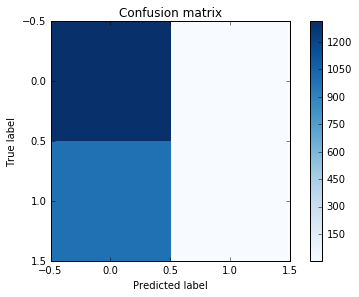

In [192]:
plot_confusion_matrix(cm)
plt.show()

In [193]:
data_p = data[['Close','Open']][2310:4621].values

In [194]:
data_p1 = pd.DataFrame(data_p,columns = ['Close','Open'])

In [195]:
result = np.c_[Y_test,Y_prediction]
result1 = pd.DataFrame(result , columns = ['test', 'prediction'])
result1.head()

,test,prediction
0,1.0,0.0
1,0.0,0.0
2,0.0,0.0
3,1.0,0.0
4,0.0,0.0


In [196]:
result2 = pd.concat([data_p1, result1], axis=1)
result2.head()

,Close,Open,test,prediction
0,18.12,17.93,1.0,0.0
1,17.81,18.24,0.0,0.0
2,17.51,17.69,0.0,0.0
3,17.51,17.45,1.0,0.0
4,17.35,17.51,0.0,0.0


In [197]:
result2["Cl - Op"] = result2['Close'] - result2['Open']

In [198]:
result2['profit'] = result2['Cl - Op'] * result2['prediction']

In [199]:
a = result2['profit'].cumsum()
result2['cumsum'] = a
result2.head()

,Close,Open,test,prediction,Cl - Op,profit,cumsum
0,18.12,17.93,1.0,0.0,0.19,0.0,0.0
1,17.81,18.24,0.0,0.0,-0.43,-0.0,0.0
2,17.51,17.69,0.0,0.0,-0.18,-0.0,0.0
3,17.51,17.45,1.0,0.0,0.06,0.0,0.0
4,17.35,17.51,0.0,0.0,-0.16,-0.0,0.0


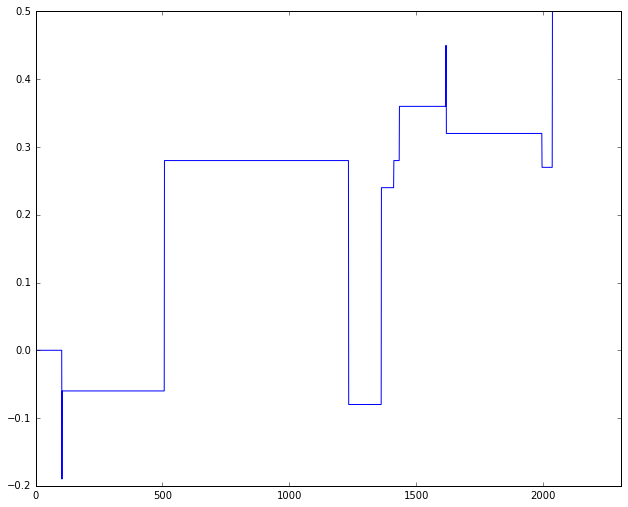

In [200]:
from IPython.core.pylabtools import figsize
figsize(10.5, 8.5)
a.plot()

In [201]:
result2['processing fee'] = (result2['Close']*(1.425/1000.0) + result2['Open']*(4.425/1000.0)) * result2['prediction']

In [202]:
result2['profit_r_fee'] = result2['profit'] - result2['processing fee']

In [203]:
result2.head()

,Close,Open,test,prediction,Cl - Op,profit,cumsum,processing fee,profit_r_fee
0,18.12,17.93,1.0,0.0,0.19,0.0,0.0,0.0,0.0
1,17.81,18.24,0.0,0.0,-0.43,-0.0,0.0,0.0,-0.0
2,17.51,17.69,0.0,0.0,-0.18,-0.0,0.0,0.0,-0.0
3,17.51,17.45,1.0,0.0,0.06,0.0,0.0,0.0,0.0
4,17.35,17.51,0.0,0.0,-0.16,-0.0,0.0,0.0,-0.0


In [204]:
b = result2['profit_r_fee'].cumsum()
result2['cumsum_r_fee'] = b
result2.head()

,Close,Open,test,prediction,Cl - Op,profit,cumsum,processing fee,profit_r_fee,cumsum_r_fee
0,18.12,17.93,1.0,0.0,0.19,0.0,0.0,0.0,0.0,0.0
1,17.81,18.24,0.0,0.0,-0.43,-0.0,0.0,0.0,-0.0,0.0
2,17.51,17.69,0.0,0.0,-0.18,-0.0,0.0,0.0,-0.0,0.0
3,17.51,17.45,1.0,0.0,0.06,0.0,0.0,0.0,0.0,0.0
4,17.35,17.51,0.0,0.0,-0.16,-0.0,0.0,0.0,-0.0,0.0


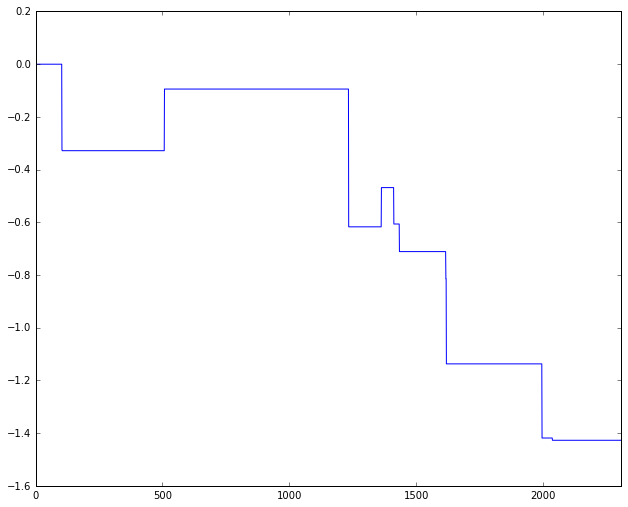

In [205]:
from IPython.core.pylabtools import figsize
figsize(10.5, 8.5)
result2['cumsum_r_fee'].plot()

In [206]:
result2

,Close,Open,test,prediction,Cl - Op,profit,cumsum,processing fee,profit_r_fee,cumsum_r_fee
0,18.12,17.93,1.0,0.0,0.19,0.0,0.0,0.0,0.0,0.000000
1,17.81,18.24,0.0,0.0,-0.43,-0.0,0.0,0.0,-0.0,0.000000
2,17.51,17.69,0.0,0.0,-0.18,-0.0,0.0,0.0,-0.0,0.000000
3,17.51,17.45,1.0,0.0,0.06,0.0,0.0,0.0,0.0,0.000000
4,17.35,17.51,0.0,0.0,-0.16,-0.0,0.0,0.0,-0.0,0.000000
5,17.20,17.38,0.0,0.0,-0.18,-0.0,0.0,0.0,-0.0,0.000000
6,17.05,17.26,0.0,0.0,-0.21,-0.0,0.0,0.0,-0.0,0.000000
7,17.17,17.14,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.000000
8,17.08,17.48,0.0,0.0,-0.40,-0.0,0.0,0.0,-0.0,0.000000
9,17.32,17.08,1.0,0.0,0.24,0.0,0.0,0.0,0.0,0.000000


In [207]:
result2['profit2'] = 0.0
#len(result2)
result2['profit2'][1]

0.0

In [208]:
result2.head()

,Close,Open,test,prediction,Cl - Op,profit,cumsum,processing fee,profit_r_fee,cumsum_r_fee,profit2
0,18.12,17.93,1.0,0.0,0.19,0.0,0.0,0.0,0.0,0.0,0.0
1,17.81,18.24,0.0,0.0,-0.43,-0.0,0.0,0.0,-0.0,0.0,0.0
2,17.51,17.69,0.0,0.0,-0.18,-0.0,0.0,0.0,-0.0,0.0,0.0
3,17.51,17.45,1.0,0.0,0.06,0.0,0.0,0.0,0.0,0.0,0.0
4,17.35,17.51,0.0,0.0,-0.16,-0.0,0.0,0.0,-0.0,0.0,0.0


In [209]:
result2['profit2'][0] = (-1) * result2['Open'][0]

for i in range(len(result2)-1):
    if result2['prediction'][i+1] == 1 and result2['prediction'][i] == 0:
        result2['profit2'][i+1] = result2['profit2'][i] + (-1) * result2['Open'][i+1]
    elif result2['prediction'][i+1] == 1 and result2['prediction'][i] == 1:
        result2['profit2'][i+1] = result2['profit2'][i]
    elif result2['prediction'][i+1] == 0 and result2['prediction'][i] == 1:
        result2['profit2'][i+1] = result2['profit2'][i] + result2['Close'][i]
    elif result2['prediction'][i+1] == 0 and result2['prediction'][i] == 0:
        result2['profit2'][i+1] = result2['profit2'][i]

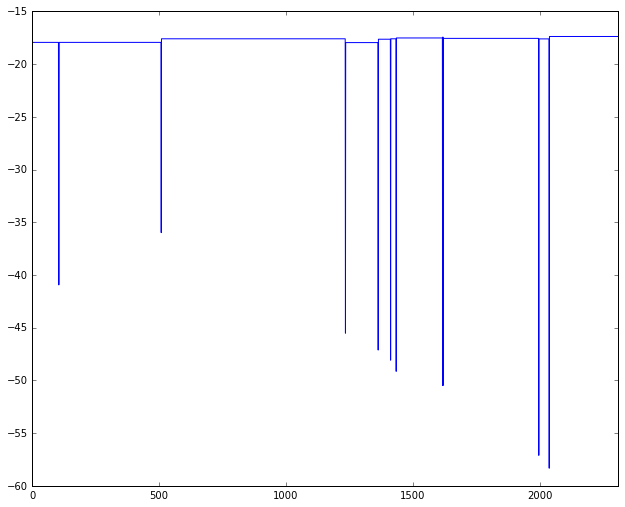

In [210]:
result2['profit2'].plot()

In [211]:
result2['processing_fee_2'] = 0.0

In [212]:
result2.head()

,Close,Open,test,prediction,Cl - Op,profit,cumsum,processing fee,profit_r_fee,cumsum_r_fee,profit2,processing_fee_2
0,18.12,17.93,1.0,0.0,0.19,0.0,0.0,0.0,0.0,0.0,-17.93,0.0
1,17.81,18.24,0.0,0.0,-0.43,-0.0,0.0,0.0,-0.0,0.0,-17.93,0.0
2,17.51,17.69,0.0,0.0,-0.18,-0.0,0.0,0.0,-0.0,0.0,-17.93,0.0
3,17.51,17.45,1.0,0.0,0.06,0.0,0.0,0.0,0.0,0.0,-17.93,0.0
4,17.35,17.51,0.0,0.0,-0.16,-0.0,0.0,0.0,-0.0,0.0,-17.93,0.0


In [213]:
result2['processing_fee_2'][0] = (-1) * result2['Open'][0]

for i in range(len(result2)-1):
    if result2['prediction'][i+1] == 1 and result2['prediction'][i] == 0:
        result2['processing_fee_2'][i+1] = result2['processing_fee_2'][i] + (-1) * result2['Open'][i+1] - (result2['Open'][i+1])*((1.425/1000.0))
    elif result2['prediction'][i+1] == 1 and result2['prediction'][i] == 1:
        result2['processing_fee_2'][i+1] = result2['processing_fee_2'][i]
    elif result2['prediction'][i+1] == 0 and result2['prediction'][i] == 1:
        result2['processing_fee_2'][i+1] = result2['processing_fee_2'][i] + result2['Close'][i] - (result2['Close'][i])*(4.425/1000.0)
    elif result2['prediction'][i+1] == 0 and result2['prediction'][i] == 0:
        result2['processing_fee_2'][i+1] = result2['processing_fee_2'][i]

In [214]:
result2.head()

,Close,Open,test,prediction,Cl - Op,profit,cumsum,processing fee,profit_r_fee,cumsum_r_fee,profit2,processing_fee_2
0,18.12,17.93,1.0,0.0,0.19,0.0,0.0,0.0,0.0,0.0,-17.93,-17.93
1,17.81,18.24,0.0,0.0,-0.43,-0.0,0.0,0.0,-0.0,0.0,-17.93,-17.93
2,17.51,17.69,0.0,0.0,-0.18,-0.0,0.0,0.0,-0.0,0.0,-17.93,-17.93
3,17.51,17.45,1.0,0.0,0.06,0.0,0.0,0.0,0.0,0.0,-17.93,-17.93
4,17.35,17.51,0.0,0.0,-0.16,-0.0,0.0,0.0,-0.0,0.0,-17.93,-17.93


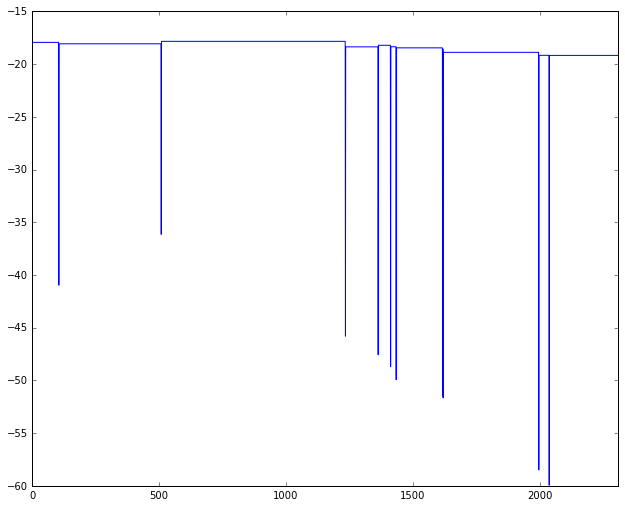

In [215]:
result2['processing_fee_2'].plot()#[1101:2301].plot()

In [216]:
result2['processing_fee_2']

0      -17.930000
1      -17.930000
2      -17.930000
3      -17.930000
4      -17.930000
5      -17.930000
6      -17.930000
7      -17.930000
8      -17.930000
9      -17.930000
10     -17.930000
11     -17.930000
12     -17.930000
13     -17.930000
14     -17.930000
15     -17.930000
16     -17.930000
17     -17.930000
18     -17.930000
19     -17.930000
20     -17.930000
21     -17.930000
22     -17.930000
23     -17.930000
24     -17.930000
25     -17.930000
26     -17.930000
27     -17.930000
28     -17.930000
29     -17.930000
          ...    
2280   -19.165211
2281   -19.165211
2282   -19.165211
2283   -19.165211
2284   -19.165211
2285   -19.165211
2286   -19.165211
2287   -19.165211
2288   -19.165211
2289   -19.165211
2290   -19.165211
2291   -19.165211
2292   -19.165211
2293   -19.165211
2294   -19.165211
2295   -19.165211
2296   -19.165211
2297   -19.165211
2298   -19.165211
2299   -19.165211
2300   -19.165211
2301   -19.165211
2302   -19.165211
2303   -19.165211
2304   -19

In [199]:
def EMA(data,day):
    #dataList = range(data['Date'].size)
    #List = []
    #List.append(0)
    #for i in dataList:
        #if i - day + 1 < 0:
        #   tmp = 0
        #    List.append(tmp)
        #elif i - day + 1 >= 0:
        #    tmp = (data['Close']
    #if data['Close'][0] 
    #tmp = (data['Close'][t] - EMA(data['Close'][t-1])*(2/(day + 1))) + EMA(data['Close'][t-1]) 
    #List = []
    
    if len(data) == day:
        return data[day-1]
    elif len(data) > 1 :
        #for t in range(len(data))[::-1]:
        t = len(data)-1
        tmp = (data[t] - EMA(data[:(t-1)],day)*(2/(day + 1))) + EMA(data[:(t-1)],day) 
        #print(t)
        #t = t - 1 
        return tmp
    
     #List.append(tmp)
        
data = [1,2,3,4,5]
#data = reversed(range(len(data)))
EMA(data,2)            
#data[:3]   
#range(len(data)-1)
#data[::-1]
#range(len(data))[::-1]
#range(len(data))[::-1]
#data[3]

TypeError: unsupported operand type(s) for *: 'NoneType' and 'int'

In [ ]:
def ema(self, data, window, position=None, previous_ema=None):
    if len(data) < window + 2:
        return None
    c = 2 / float(window + 1)
    if not previous_ema:
        return self.ema(data, window, window, self.sma(data[-window*2 + 1:-window + 1], window))
    else:
        current_ema = (c * data[-position]) + ((1 - c) * previous_ema)
        if position > 0:
            return self.ema(data, window, position - 1, current_ema)
        return previous_ema
    
def ema(self, data, window):
    if len(data) < 2 * window:
        raise ValueError("data is too short")
    c = 2.0 / (window + 1)
    current_ema = self.sma(data[-window*2:-window], window)
    for value in data[-window:]:
        current_ema = (c * value) + ((1 - c) * current_ema)
    return current_ema

def exponential_moving_average(period=1000):
    multiplier = 2 / float(1 + period)
    cumulative_temp = yield None  # We are being primed

    # Start by just returning the simple average until we have enough data.
    for i in xrange(1, period + 1):
        cumulative_temp += yield cumulative_temp / float(i)

    # Grab the simple average,
    ema = cumulative_temp / period

    # and start calculating the exponentially smoothed average we want.
    while True:
        ema = (((yield ema) - ema) * multiplier) + ema